In [68]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib import colors
# from matplotlib.ticker import PercentFormatter

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [73]:
import csv

with open('./data.csv') as f:
    # we are using DictReader because we want our information to be in dictionary format.
    reader = csv.DictReader(f)
    # some more code
    rolling_list = []
    for i in reader:
        rolling_list.append(i)
    print(rolling_list)

[OrderedDict([('number', '1'), ('year', '1967'), ('album', "Sgt. Pepper's Lonely Hearts Club Band"), ('artist', 'The Beatles'), ('genre', 'Rock'), ('subgenre', 'Rock & Roll, Psychedelic Rock')]), OrderedDict([('number', '2'), ('year', '1966'), ('album', 'Pet Sounds'), ('artist', 'The Beach Boys'), ('genre', 'Rock'), ('subgenre', 'Pop Rock, Psychedelic Rock')]), OrderedDict([('number', '3'), ('year', '1966'), ('album', 'Revolver'), ('artist', 'The Beatles'), ('genre', 'Rock'), ('subgenre', 'Psychedelic Rock, Pop Rock')]), OrderedDict([('number', '4'), ('year', '1965'), ('album', 'Highway 61 Revisited'), ('artist', 'Bob Dylan'), ('genre', 'Rock'), ('subgenre', 'Folk Rock, Blues Rock')]), OrderedDict([('number', '5'), ('year', '1965'), ('album', 'Rubber Soul'), ('artist', 'The Beatles'), ('genre', 'Rock, Pop'), ('subgenre', 'Pop Rock')]), OrderedDict([('number', '6'), ('year', '1971'), ('album', "What's Going On"), ('artist', 'Marvin Gaye'), ('genre', 'Funk / Soul'), ('subgenre', 'Soul')]

In [4]:
def find_max_year():
    max_year = 0
    for item in rolling_list:
        if int(item['year']) > max_year:
            max_year = int(item['year'])
    return max_year

def find_min_year():
    min_year = 2011
    for item in rolling_list:
        if int(item['year']) < min_year:
            min_year = int(item['year'])
    return min_year

def x_axis():
    year = find_min_year()
    mod_year = year % 10
    lower_limit = year - mod_year
    upper_limit = lower_limit + 9

    decades = []
    while lower_limit < find_max_year():
        decades.append((lower_limit, upper_limit))
        upper_limit += 10
        lower_limit += 10
    return decades
x_axis()

[(1950, 1959),
 (1960, 1969),
 (1970, 1979),
 (1980, 1989),
 (1990, 1999),
 (2000, 2009),
 (2010, 2019)]

In [5]:
def find_by_name(album_name):
    for item in rolling_list:
        if album_name == item['album']:
            return item
    

def find_by_rank(number):
    for item in rolling_list:
        if str(number) == item['number']:
            return item['album']
    


def find_by_year(year):
    album_by_year = []
    for item in rolling_list:
        if str(year) == item['year']:
            album_by_year.append(item['album'])
    
    return album_by_year


def find_by_years(start_year, end_year):
    album_by_years = []
    start = start_year
    
    while start <= end_year:
        album_by_years.extend(find_by_year(start))
        start += 1
    return album_by_years


def find_by_ranks(start_rank, end_rank):
    album_by_ranks = []
    start = start_rank
    
    while start <= end_rank:
        album_by_ranks.append(find_by_rank(start))
        start += 1
    return album_by_ranks


def all_titles():
    titles_list = []
    for item in rolling_list:
        titles_list.append(item['album'])
    return titles_list
                 
def all_artists():
    artists_list = []
    for item in rolling_list:
        artists_list.append(item['artist'])
    return artists_list

def artist_most_hits():
    max_count = 0
    artist = None
    artists_list = all_artists()
    artists_set = set(artists_list)
    for singer in artists_set:
        temp_count = artists_list.count(singer)
        if temp_count >= max_count:
            max_count = temp_count
            artist = singer
    return artist

def artist_most_hits_one_line():
    artists_list = all_artists()
    return max(artists_list, key = artists_list.count)

def popular_word():
    word_dict = {}
    titles_list = all_titles()
    for title in titles_list:
        for word in title.split():
            if word in word_dict:
                word_dict[word] +=1 
            else:
                word_dict[word] = 1
    max_count = 0
    max_word = None
    for word in word_dict:
        if word_dict[word] >= max_count:
            max_count = word_dict[word]
            max_word = word
    return max_word
    
def popular_word():
    word_dict = {}
    titles_list = all_titles()
    for title in titles_list:
        for word in title.split():
            l_word = word.lower()
            if l_word in word_dict:
                word_dict[l_word] +=1 
            else:
                word_dict[l_word] = 1
    max_count = 0
    max_word = None
    for word in word_dict:
        if word_dict[word] >= max_count:
            max_count = word_dict[word]
            max_word = word
    return max_word


def find_max_year():
    max_year = 0
    for item in rolling_list:
        if int(item['year']) > max_year:
            max_year = int(item['year'])
    return max_year

def find_min_year():
    min_year = 2011
    for item in rolling_list:
        if int(item['year']) < min_year:
            min_year = int(item['year'])
    return min_year

def create_x_y_values():
    x_y_values = []
    year = find_min_year()
    mod_year = year % 10
    lower_limit = year - mod_year
    upper_limit = lower_limit + 9

    decades = []
    while lower_limit < find_max_year():
        decades.append((lower_limit, upper_limit))
        upper_limit += 10
        lower_limit += 10

    decade_dict = {}
    for decade in decades:
        decade_dict[decade] = find_by_years(decade[0], decade[1])

    y_values = []
    x_values = []
    for key in decade_dict:
        x_values.append(key[0])
        y_values.append(len(decade_dict[key]))
    x_y_values.append(x_values)
    x_y_values.append(y_values)
    
    return x_y_values
create_x_y_values()

[[1950, 1960, 1970, 1980, 1990, 2000, 2010], [9, 99, 181, 83, 65, 39, 2]]

In [6]:
x_values = create_x_y_values()[0]
y_values = create_x_y_values()[1]

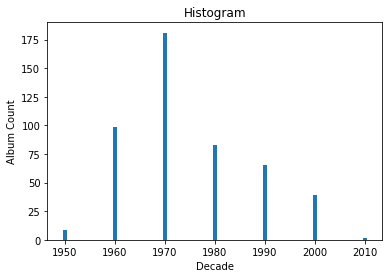

In [7]:
plt.bar(x_values, y_values)
plt.ylabel('Album Count')
plt.xlabel('Decade')
plt.title('Histogram')

#num_bins = 5

# fig, ax = plt.subplots()

# #  the histogram of the data
# n, bins, patches = ax.hist(num_bins, density=1)
plt.show()

(array([ 23., 177., 110.,  83.,  60.,  25.]),
 array([1955.        , 1964.33333333, 1973.66666667, 1983.        ,
        1992.33333333, 2001.66666667, 2011.        ]),
 <a list of 6 Patch objects>)

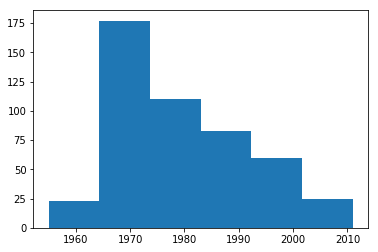

In [72]:
plt.hist([int(album['year']) for album in rolling_list], bins=6)

In [9]:
[album['genre'] for album in rolling_list].count("Jazz")

7

In [23]:
def find_by_genre(genre):
    for item in rolling_list:
        if genre in item['genre']:
            return item['genre']

In [52]:
vals = [album['genre'] for album in rolling_list]
set_X = set(vals)
q = list(set_X)
q1 = []
for ite in vals:
    if type(ite.split(",")) == list:
        q1.extend(ite.split(","))
    else:
        q1.append(ite)
        
x_vals = []
x_dict = {}
for item in vals:
    for word in q:
        if word in item:
            x_vals.append(find_by_genre(word))
            
q1
len(set(q1))

23

In [28]:
big_dict = {}
for word in q1:
    l_word = word.lower()
    if l_word in big_dict:
        big_dict[l_word] +=1 
    else:
        big_dict[l_word] = 1


In [12]:
vals = [album['genre'] for album in rolling_list]
vals

['Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock, Pop',
 'Funk / Soul',
 'Rock',
 'Rock',
 'Rock, Blues',
 'Rock',
 'Rock',
 'Jazz',
 'Rock',
 'Rock',
 'Rock, Blues',
 'Rock',
 'Rock',
 'Rock',
 'Jazz, Rock, Blues, Folk, World, & Country',
 'Funk / Soul, Pop',
 'Rock',
 'Blues',
 'Rock',
 'Funk / Soul',
 'Funk / Soul',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Pop',
 'Rock, Folk, World, & Country',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock, Pop',
 'Rock',
 'Folk, World, & Country',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Rock',
 'Classical, Stage & Screen',
 'Reggae',
 'Jazz',
 'Hip Hop',
 'Rock, Blues',
 'Rock, Blues',
 'Rock',
 'Funk / Soul',
 'Rock',
 'Jazz, Funk / Soul',
 'Rock, Blues',
 'Rock',
 'Funk / Soul',
 'Rock, Funk / Soul, Pop',
 'Rock',
 'Funk / Soul',
 'Rock',
 'Electronic, Rock',
 'Rock',
 'Rock, Funk / Soul, Pop',
 'Jazz, Rock, Funk / Soul, Folk, World, & Country',
 'Electronic, Rock',
 'Funk / Soul, Pop',
 'Rock',
 'Rock',
 'Jazz, Rock, Funk / Soul, Pop, Folk, World, & 

Text(0.5, 1.0, 'Histogram')

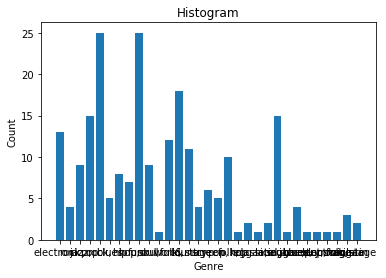

In [30]:
plt.bar(list(big_dict.keys()), list(big_dict.values()))
plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Histogram')

In [103]:
vals = [album['genre'] for album in rolling_list]
q1 = []
for ite in vals:
    if type(ite.split(",")) == list:
        q1.extend((" ").join(ite).split(","))
    else:
        q1.append(ite)

(array([306.,  81.,  22.,  18.,  16.,  17.,  63.,  18.,   1.,  14.,  12.,
         28.,  27.,  59.,   4.,   4.,   2.,   2.,   3.,   6.,   3.,   5.,
          7.]),
 array([ 0.        ,  1.65217391,  3.30434783,  4.95652174,  6.60869565,
         8.26086957,  9.91304348, 11.56521739, 13.2173913 , 14.86956522,
        16.52173913, 18.17391304, 19.82608696, 21.47826087, 23.13043478,
        24.7826087 , 26.43478261, 28.08695652, 29.73913043, 31.39130435,
        33.04347826, 34.69565217, 36.34782609, 38.        ]),
 <a list of 23 Patch objects>)

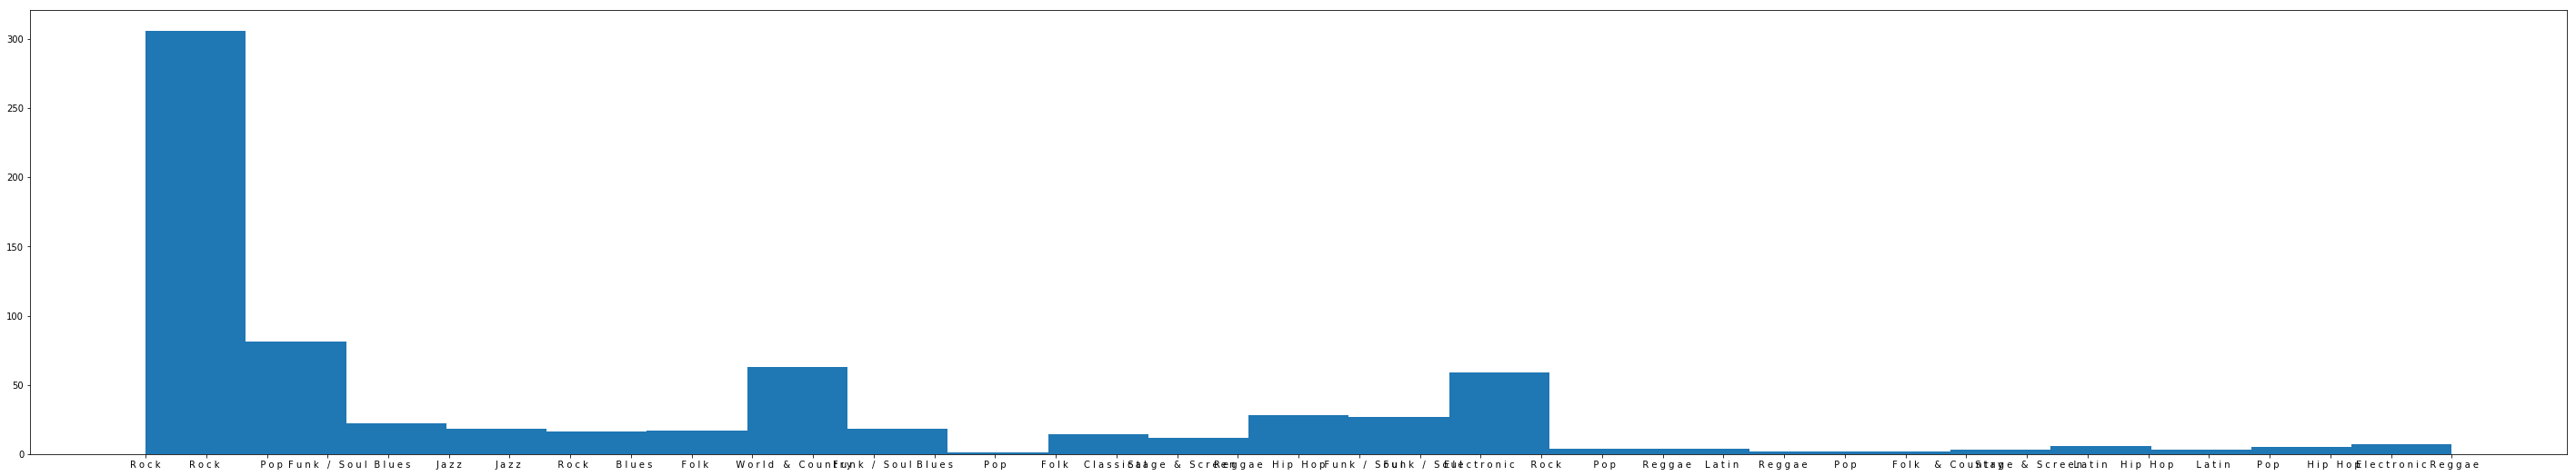

In [104]:
fig_size = plt.rcParams["figure.figsize"]

# Prints: [8.0, 6.0]
#print "Current size:", fig_size

# Set figure width to 12 and height to 9
fig_size[0] = 50
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.hist(q1, bins=23)

In [78]:
for i in range(0, 5):
    print(i)

0
1
2
3
4


In [81]:
type(range(0, 5))

range

In [80]:
print(list(range(0,5)))

[0, 1, 2, 3, 4]


In [87]:
import json

file = open('track_data.json', 'r')
json_data = json.load(file)

print(json_data)

[{'artist': 'The Beatles', 'album': "Sgt. Pepper's Lonely Hearts Club Band", 'tracks': ["Sgt. Pepper's Lonely Hearts Club Band - Remix", 'With A Little Help From My Friends - Remix', 'Lucy In The Sky With Diamonds - Remix', 'Getting Better - Remix', 'Fixing A Hole - Remix', "She's Leaving Home - Remix", 'Being For The Benefit Of Mr. Kite! - Remix', 'Within You Without You - Remix', "When I'm Sixty-Four - Remix", 'Lovely Rita - Remix', 'Good Morning Good Morning - Remix', "Sgt. Pepper's Lonely Hearts Club Band (Reprise) - Remix", 'A Day In The Life - Remix', "Sgt. Pepper's Lonely Hearts Club Band - Take 9 And Speech", 'With A Little Help From My Friends - Take 1 / False Start And Take 2 / Instrumental', 'Lucy In The Sky With Diamonds - Take 1', 'Getting Better - Take 1 / Instrumental And Speech At The End', 'Fixing A Hole - Speech And Take 3', "She's Leaving Home - Take 1 / Instrumental", 'Being For The Benefit Of Mr. Kite! - Take 4', 'Within You Without You - Take 1 / Indian Instrument

In [83]:
json_data[0]

{'artist': 'The Beatles',
 'album': "Sgt. Pepper's Lonely Hearts Club Band",
 'tracks': ["Sgt. Pepper's Lonely Hearts Club Band - Remix",
  'With A Little Help From My Friends - Remix',
  'Lucy In The Sky With Diamonds - Remix',
  'Getting Better - Remix',
  'Fixing A Hole - Remix',
  "She's Leaving Home - Remix",
  'Being For The Benefit Of Mr. Kite! - Remix',
  'Within You Without You - Remix',
  "When I'm Sixty-Four - Remix",
  'Lovely Rita - Remix',
  'Good Morning Good Morning - Remix',
  "Sgt. Pepper's Lonely Hearts Club Band (Reprise) - Remix",
  'A Day In The Life - Remix',
  "Sgt. Pepper's Lonely Hearts Club Band - Take 9 And Speech",
  'With A Little Help From My Friends - Take 1 / False Start And Take 2 / Instrumental',
  'Lucy In The Sky With Diamonds - Take 1',
  'Getting Better - Take 1 / Instrumental And Speech At The End',
  'Fixing A Hole - Speech And Take 3',
  "She's Leaving Home - Take 1 / Instrumental",
  'Being For The Benefit Of Mr. Kite! - Take 4',
  'Within You

In [84]:
json_data[0].keys()

dict_keys(['artist', 'album', 'tracks'])

In [85]:
json_data[0]["tracks"]

["Sgt. Pepper's Lonely Hearts Club Band - Remix",
 'With A Little Help From My Friends - Remix',
 'Lucy In The Sky With Diamonds - Remix',
 'Getting Better - Remix',
 'Fixing A Hole - Remix',
 "She's Leaving Home - Remix",
 'Being For The Benefit Of Mr. Kite! - Remix',
 'Within You Without You - Remix',
 "When I'm Sixty-Four - Remix",
 'Lovely Rita - Remix',
 'Good Morning Good Morning - Remix',
 "Sgt. Pepper's Lonely Hearts Club Band (Reprise) - Remix",
 'A Day In The Life - Remix',
 "Sgt. Pepper's Lonely Hearts Club Band - Take 9 And Speech",
 'With A Little Help From My Friends - Take 1 / False Start And Take 2 / Instrumental',
 'Lucy In The Sky With Diamonds - Take 1',
 'Getting Better - Take 1 / Instrumental And Speech At The End',
 'Fixing A Hole - Speech And Take 3',
 "She's Leaving Home - Take 1 / Instrumental",
 'Being For The Benefit Of Mr. Kite! - Take 4',
 'Within You Without You - Take 1 / Indian Instruments',
 "When I'm Sixty-Four - Take 2",
 'Lovely Rita - Speech And Tak

In [91]:
# open the text file in read
text_file = open('top-500-songs.txt', 'r')
# read each line of the text file
# here is where you can print out the lines to your terminal and get an idea 
# for how you might think about re-formatting the data
lines = text_file.readlines()

print(lines)
# the output will look something like this:


['1\tLike a Rolling Stone\tBob Dylan\t1965\n', '2\tSatisfaction\tThe Rolling Stones\t1965\n', '3\tImagine\tJohn Lennon\t1971\n', "4\tWhat's Going On\tMarvin Gaye\t1971\n", '5\tRespect\tAretha Franklin\t1967\n', '6\tGood Vibrations\tThe Beach Boys\t1966\n', '7\tJohnny B. Goode\tChuck Berry\t1958\n', '8\tHey Jude\tThe Beatles\t1968\n', '9\tSmells Like Teen Spirit\tNirvana\t1991\n', "10\tWhat'd I Say\tRay Charles\t1959\n", '11\tMy Generation\tThe Who\t1965\n', '12\tA Change Is Gonna Come\tSam Cooke\t1964\n', '13\tYesterday\tThe Beatles\t1965\n', "14\tBlowin' in the Wind\tBob Dylan\t1963\n", '15\tLondon Calling\tThe Clash\t1980\n', '16\tI Want to Hold Your Hand\tThe Beatles\t1963\n', '17\tPurple Haze\tThe Jimi Hendrix Experience\t1967\n', '18\tMaybellene\tChuck Berry\t1955\n', '19\tHound Dog\tElvis Presley\t1956\n', '20\tLet It Be\tThe Beatles\t1970\n', '21\tBorn to Run\tBruce Springsteen\t1975\n', '22\tBe My Baby\tThe Ronettes\t1963\n', '23\tIn My Life\tThe Beatles\t1965\n', '24\tPeople G

In [102]:
list_of_lines = ("\n").join(lines).split("\n")
list_of_lines.remove("")
split_list = [item.split("\t") for item in list_of_lines]
split_list.remove([""])
split_list
#similar_rolling_dict = {}
# for line in 

[['1', 'Like a Rolling Stone', 'Bob Dylan', '1965'],
 ['2', 'Satisfaction', 'The Rolling Stones', '1965'],
 ['3', 'Imagine', 'John Lennon', '1971'],
 [''],
 ['4', "What's Going On", 'Marvin Gaye', '1971'],
 [''],
 ['5', 'Respect', 'Aretha Franklin', '1967'],
 [''],
 ['6', 'Good Vibrations', 'The Beach Boys', '1966'],
 [''],
 ['7', 'Johnny B. Goode', 'Chuck Berry', '1958'],
 [''],
 ['8', 'Hey Jude', 'The Beatles', '1968'],
 [''],
 ['9', 'Smells Like Teen Spirit', 'Nirvana', '1991'],
 [''],
 ['10', "What'd I Say", 'Ray Charles', '1959'],
 [''],
 ['11', 'My Generation', 'The Who', '1965'],
 [''],
 ['12', 'A Change Is Gonna Come', 'Sam Cooke', '1964'],
 [''],
 ['13', 'Yesterday', 'The Beatles', '1965'],
 [''],
 ['14', "Blowin' in the Wind", 'Bob Dylan', '1963'],
 [''],
 ['15', 'London Calling', 'The Clash', '1980'],
 [''],
 ['16', 'I Want to Hold Your Hand', 'The Beatles', '1963'],
 [''],
 ['17', 'Purple Haze', 'The Jimi Hendrix Experience', '1967'],
 [''],
 ['18', 'Maybellene', 'Chuck Ber